# House Price Prediction

### Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Uncomment and run this cell if opened in Google Colab

In [36]:

# import requests

# url = "https://github.com/nagrohan579/house_price_prediction_linear_regression_model/raw/main/Housing.csv"
# response = requests.get(url)
# with open("/content/Housing.csv", "wb") as f:
#     f.write(response.content)


In [37]:
housing = pd.read_csv("Housing.csv")

In [38]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Inspection

In [39]:
housing.shape

(545, 13)

In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [41]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Cleaning

In [42]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

#### Outlier Analysis

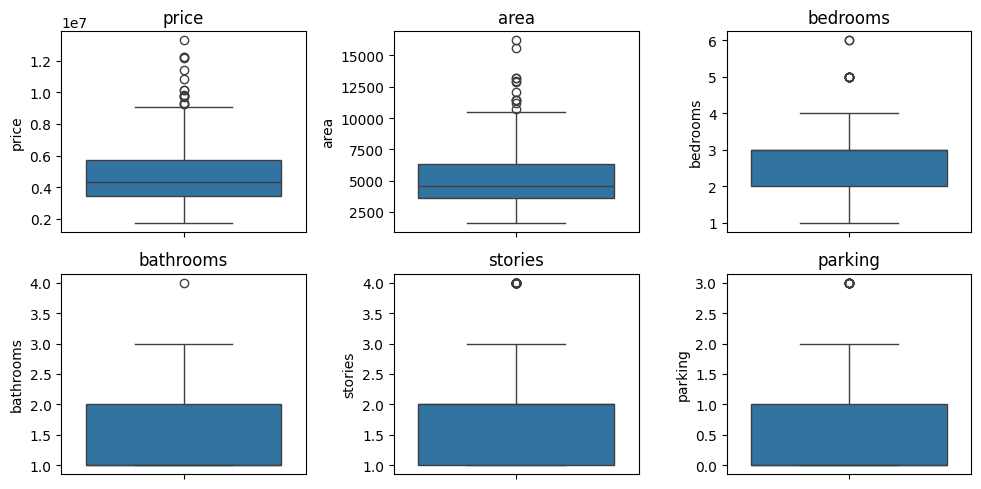

In [43]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0]).set_title('price')
plt2 = sns.boxplot(housing['area'], ax = axs[0,1]).set_title('area')
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2]).set_title('bedrooms')
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0]).set_title('bathrooms')
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1]).set_title('stories')
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2]).set_title('parking')

plt.tight_layout()

#### Outlier Treatment

Price and area have considerable outliers. We can drop the outliers as we have sufficient data.

**Outlier Treatment for price**

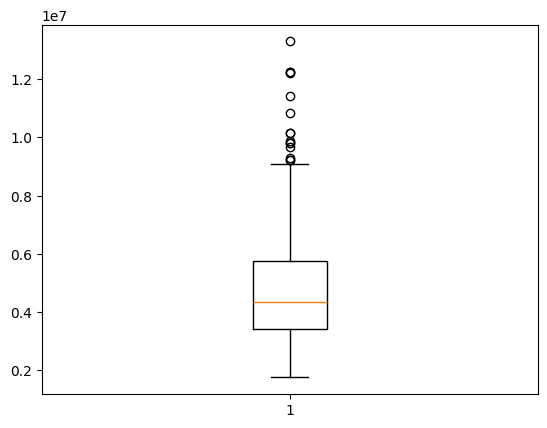

In [44]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing.drop(housing[(housing.price < Q1 - 1.5*IQR) | (housing.price > Q3 + 1.5*IQR)].index, inplace=True)


**Outlier Treatment for area**

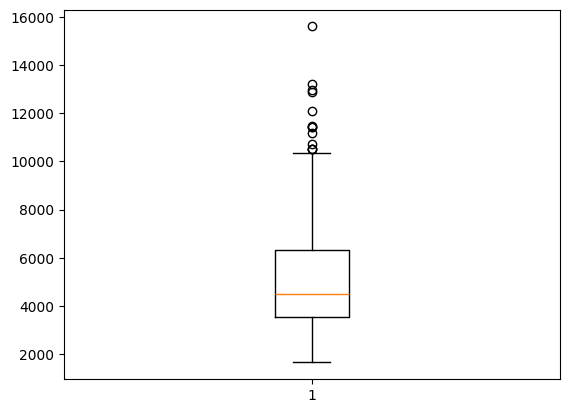

In [45]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing.drop(housing[(housing.area < Q1 - 1.5*IQR) | (housing.area > Q3 + 1.5*IQR)].index, inplace=True)

##### Outlier Analysis
We have removed the outliers in the price and area columns

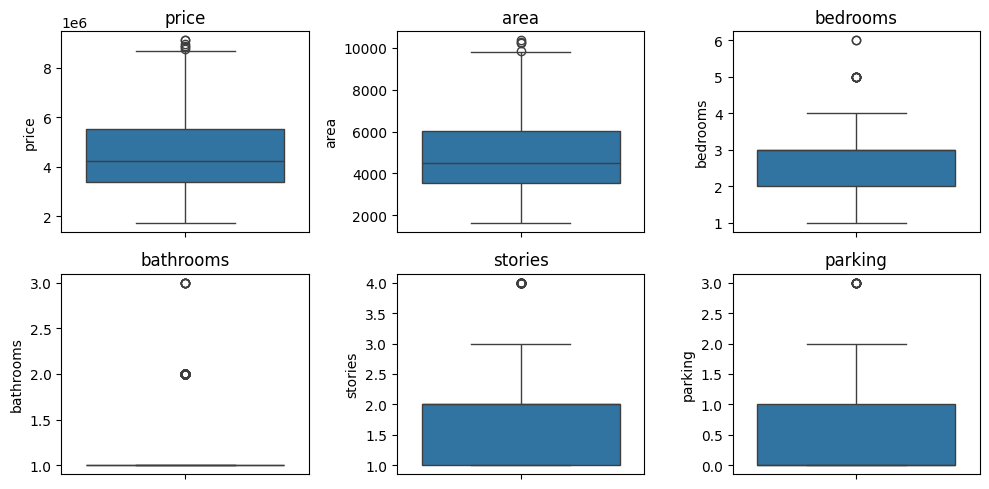

In [46]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0]).set_title('price')
plt2 = sns.boxplot(housing['area'], ax = axs[0,1]).set_title('area')
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2]).set_title('bedrooms')
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0]).set_title('bathrooms')
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1]).set_title('stories')
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2]).set_title('parking')

plt.tight_layout()

### Exploratory Data Analytics



##### Visualising Numeric Variables

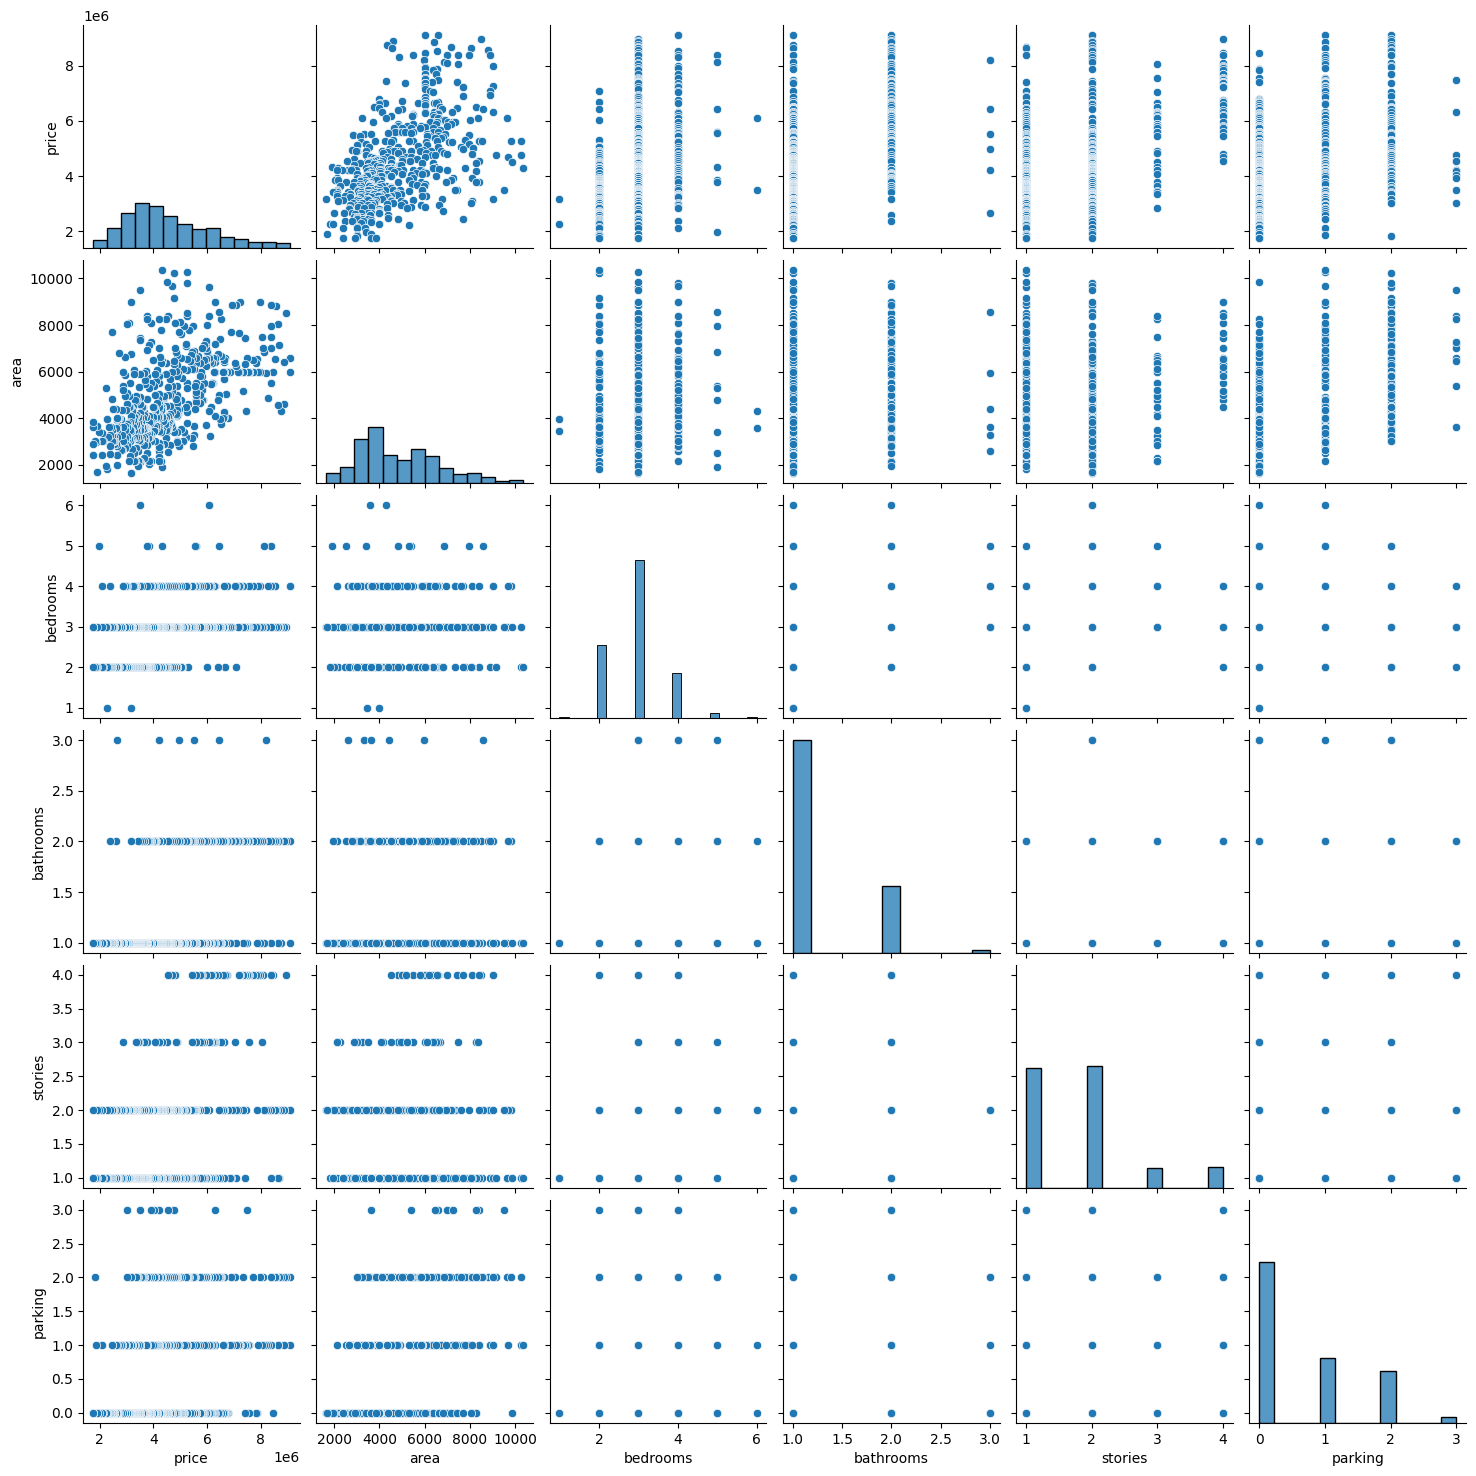

In [47]:
sns.pairplot(housing)

##### Visualising Categorical Variables

<Axes: xlabel='furnishingstatus', ylabel='price'>

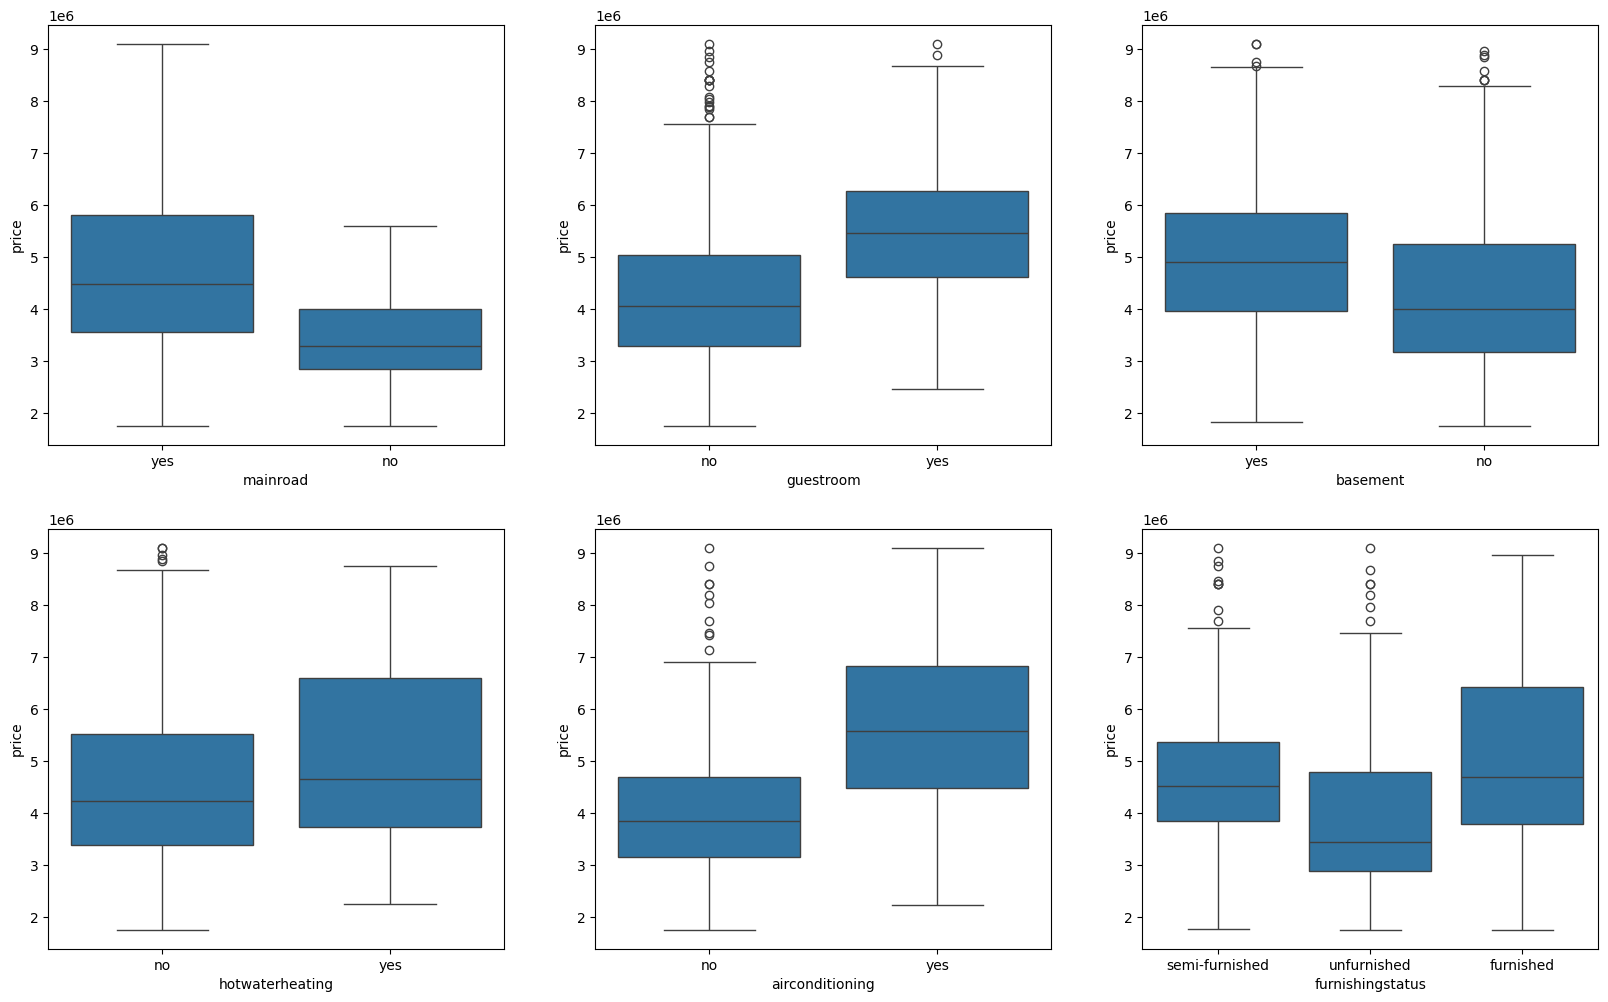

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

<Axes: xlabel='furnishingstatus', ylabel='price'>

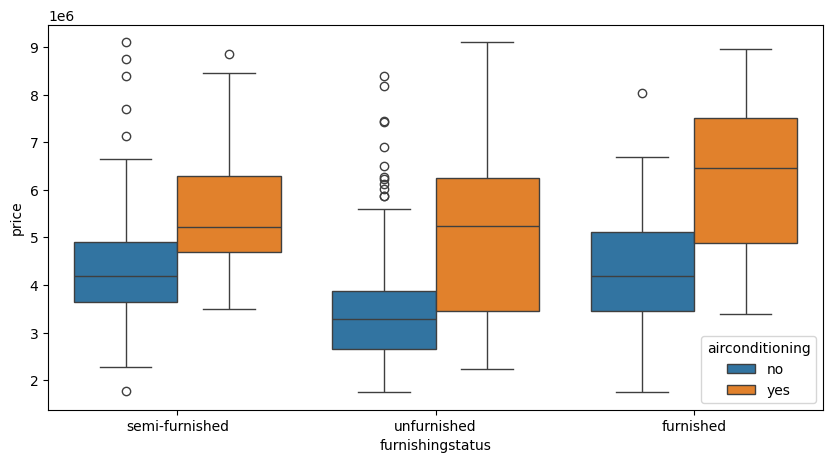

In [49]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)

### Data Preperation

As we can see, we have a lot of 'Yes'/'No' values. But we can't train the linear regression model on 'Yes'/'No' values. So we'll convert them to 1s and 0s.

In [50]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Applying the function to the housing list

housing[varlist] = housing[varlist].apply(lambda x:x.map({'yes':1,'no':0}))

In [52]:
# Checking the dataframe now for changes

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


##### Dummy variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well.

For this, we will use something called `dummy variables`.

In [53]:
# Get dummy variables for the feature 'furnishingstatus'
fstatus = pd.get_dummies(housing['furnishingstatus'])

In [55]:
fstatus.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [56]:
# Let's drop the first column from status df using 'drop_first = True'

fstatus = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [58]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, fstatus], axis = 1)

In [59]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [60]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [61]:
# Here's the dataframe after dropping the 'furnishingstatus' column

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
